In [1]:
%pip install kmeans_pytorch

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from kmeans_pytorch import kmeans, kmeans_predict

In [3]:
df = pd.read_csv(r'C:\deep\chap11\data\iris.csv')
df.info()
print('-------------------------------')
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
-------------------------------
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0      1            5.1           3.5            1.4           0.2     Iris-setosa
1      2            4.9           3.0            1.4           0.2     Iris-setosa
2      3            4.7           3.2            1.3           0.2     Iris-setosa
3      4            4.6           3.1            1.5           0.2     Iris-setosa
4      5            5.0           3

In [4]:
data = pd.get_dummies(df, columns=['Species'])
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,True,False,False
1,2,4.9,3.0,1.4,0.2,True,False,False
2,3,4.7,3.2,1.3,0.2,True,False,False
3,4,4.6,3.1,1.5,0.2,True,False,False
4,5,5.0,3.6,1.4,0.2,True,False,False
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,False,False,True
146,147,6.3,2.5,5.0,1.9,False,False,True
147,148,6.5,3.0,5.2,2.0,False,False,True
148,149,6.2,3.4,5.4,2.3,False,False,True


In [5]:
from sklearn.model_selection import train_test_split
x, y = train_test_split(data, test_size=0.2, random_state=123)

In [6]:
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit(data).transform(x)
y_scaled = scaler.fit(y).transform(y)

In [8]:
x = torch.from_numpy(X_scaled)
y = torch.from_numpy(y_scaled)

In [9]:
print(x.size())
print(y.size())
print(x)

torch.Size([120, 8])
torch.Size([30, 8])
tensor([[ 1.2817e+00,  1.8862e+00, -5.8776e-01,  1.3314e+00,  9.2206e-01,
         -7.0711e-01, -7.0711e-01,  1.4142e+00],
        [ 1.0277e+00,  1.8983e-01, -1.9762e+00,  7.0589e-01,  3.9617e-01,
         -7.0711e-01, -7.0711e-01,  1.4142e+00],
        [-1.0508e+00, -1.3854e+00,  3.3785e-01, -1.2275e+00, -1.3130e+00,
          1.4142e+00, -7.0711e-01, -7.0711e-01],
        [-1.7205e+00, -9.0068e-01,  1.0321e+00, -1.3413e+00, -1.3130e+00,
          1.4142e+00, -7.0711e-01, -7.0711e-01],
        [-2.8868e-01,  1.8983e-01, -1.9762e+00,  1.3724e-01, -2.6119e-01,
         -7.0711e-01,  1.4142e+00, -7.0711e-01],
        [ 4.2725e-01, -1.0218e+00, -1.7448e+00, -2.6082e-01, -2.6119e-01,
         -7.0711e-01,  1.4142e+00, -7.0711e-01],
        [ 1.3048e+00,  2.4920e+00,  1.7263e+00,  1.5020e+00,  1.0535e+00,
         -7.0711e-01, -7.0711e-01,  1.4142e+00],
        [-1.6051e+00, -5.3718e-01,  1.9577e+00, -1.1707e+00, -1.0500e+00,
          1.4142e+00, -7

In [10]:
num_clusters = 3
cluster_ids_x, cluster_centers = kmeans(
    X=x, num_clusters=num_clusters, distance='euclidean', device=device)

running k-means on cpu..


[running kmeans]: 4it [00:00, 725.69it/s, center_shift=0.000000, iteration=4, tol=0.000100]


In [11]:
cluster_ids_y = kmeans_predict(y, cluster_centers, 'euclidean', device=device)

predicting on cpu..


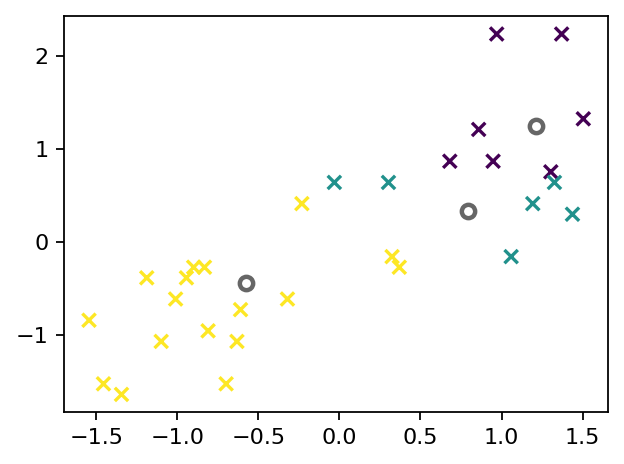

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 3), dpi=160)
plt.scatter(y[:, 0], y[:, 1], c=cluster_ids_y, cmap='viridis', marker='x')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='white', alpha=0.6, edgecolors='black', linewidths=2)
plt.tight_layout()
plt.show()

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
X_train = np.load(r'C:\deep\chap11\data\data.npy')

[[3.0363831  3.09828041]
 [1.60629419 1.3470999 ]]


[[[ 0.8465178   0.38644336]
  [ 0.38644336  0.73395863]]

 [[ 0.75275611 -0.5054196 ]
  [-0.5054196   0.74286061]]]


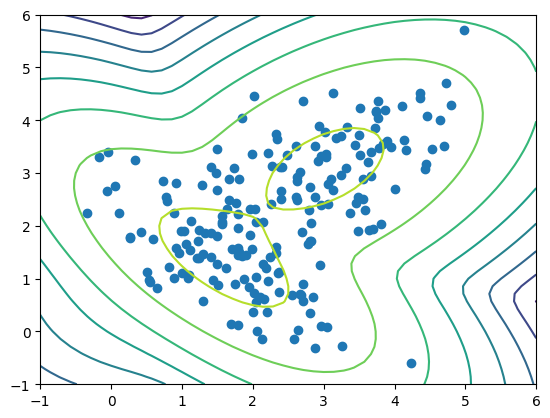

In [14]:
gmm = GaussianMixture(n_components=2)
gmm.fit(X_train)

print(gmm.means_)
print('\n')
print(gmm.covariances_)

X, Y = np.meshgrid(np.linspace(-1, 6), np.linspace(-1, 6))
XX = np.array([X.ravel(), Y.ravel()]).T

Z = gmm.score_samples(XX)
Z = Z.reshape((50, 50))

plt.contour(X, Y, Z)
plt.scatter(X_train[:,0], X_train[:,1])
plt.show()

In [15]:
%pip install Minisom

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for Minisom: filename=minisom-2.3.5-py3-none-any.whl size=12132 sha256=69ffcd6ced6a28c25b43d7ac06ad63c0df3cdb8c523d4d97222a4fbf9de44655
  Stored in directory: c:\users\516-08\appdata\local\pip\cache\wheels\76\b7\47\eb538cc16f29a1da8734d1548a0c19b642f92e46cd899eac33
Successfully built Minisom
Note: you may need to restart the kernel to use updated packages.


In [16]:
import numpy as np
from sklearn.datasets import load_digits
from minisom import MiniSom
from pylab import plot, axis, show, pcolor, colorbar, bone

digits = load_digits()
data = digits.data
labels = digits.target

SOM 초기화.

. SOM 진행 종료


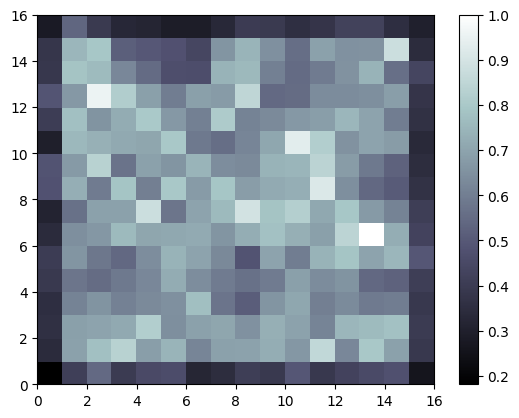

In [17]:
som = MiniSom(16, 16, 64, sigma=1.0, learning_rate=0.5)
som.random_weights_init(data)
print("SOM 초기화.")
som.train_random(data, 10000)
print("\n. SOM 진행 종료")

bone()
pcolor(som.distance_map().T)
colorbar()

C:\Users\516-08\AppData\Local\Temp\ipykernel_17648\2359949340.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  labels[labels=='0'] = 0
C:\Users\516-08\AppData\Local\Temp\ipykernel_17648\2359949340.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  labels[labels=='1'] = 1
C:\Users\516-08\AppData\Local\Temp\ipykernel_17648\2359949340.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  labels[labels=='2'] = 2
C:\Users\516-08\AppData\Local\Temp\ipykernel_17648\2359949340.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  labels[labels=='3'] = 3
C:\Users\516-08\AppData\Local\Temp\ipykernel_17648\2359949340.py:5: FutureWarning: elementwise comparison failed; return

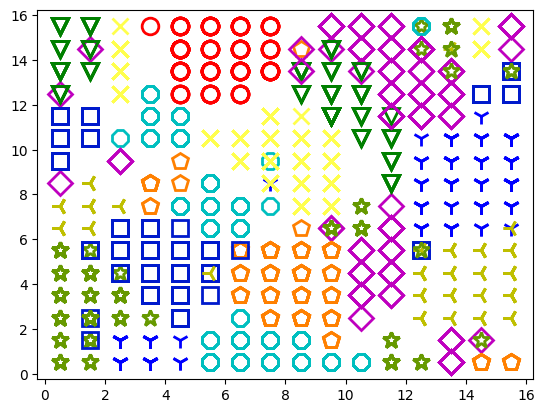

In [21]:
labels[labels=='0'] = 0
labels[labels=='1'] = 1
labels[labels=='2'] = 2
labels[labels=='3'] = 3
labels[labels=='4'] = 4
labels[labels=='5'] = 5
labels[labels=='6'] = 6
labels[labels=='7'] = 7
labels[labels=='8'] = 8
labels[labels=='9'] = 9

markers = ['o', 'v', '1', '3', '8', 's', 'p', 'x', 'D', '*']
colors = ["r", "g", "b", "y", "c", (0,0.1,0.8), (1,0.5,0), (1,1,0.3), "m", (0.4,0.6,0)]
for cnt, xx in enumerate(data):
    w = som.winner(xx)
    plot(w[0]+.5, w[1]+.5, markers[labels[cnt]],
        markerfacecolor='None', markeredgecolor=colors[labels[cnt]],
        markersize=12, markeredgewidth=2)
show()